In [32]:
import pandas as pd
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from matplotlib import pyplot

Ejecutar primero código dataset_fecha_consumos_reducido.ipynb

In [14]:
df = pd.read_csv('../data/read_delta_day.csv', sep = ',')

In [15]:
df.head(5)

,day_of_year,READINGINTEGER,DELTAINTEGER
0,2019-02-01,531935.429534,24.616272
1,2019-02-02,532960.298180,16.624317
2,2019-02-03,533147.705400,17.320204
3,2019-02-04,533192.886830,22.657334
4,2019-02-05,533832.163550,18.684204


Fuente: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/ Jason Brownlee PhD

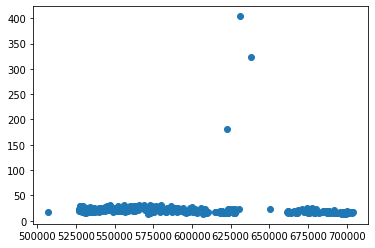

In [16]:
#¿Variables relacionadas?

pyplot.scatter(df['READINGINTEGER'], df['DELTAINTEGER'])
pyplot.show()

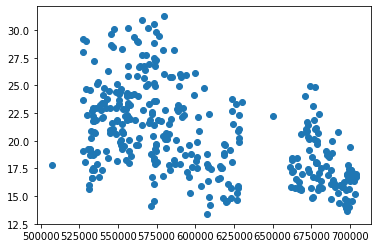

In [17]:
df = df[df['DELTAINTEGER'] < 100] 
pyplot.scatter(df['READINGINTEGER'], df['DELTAINTEGER'])
pyplot.show()
#No veo absolutamente nada...

In [21]:
#Covarianzas
#cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)
covariance = cov(df['READINGINTEGER'], df['DELTAINTEGER'])
print(covariance)

[[ 3.24970537e+09 -1.18593274e+05]
 [-1.18593274e+05  1.60034347e+01]]


La covarianza entre las dos variables es 3.24970537e+09. Al ser positiva, se sugiere que las variables cambian en la misma dirección. El problema de la covarianza como herramienta estadística es su baja interpretabilidad. Por ello se procede a emplear el coeficiente de correlación de Pearson.

#### Pearson

El coeficiente de correlación de Pearson se puede emplear para sintetizar la fuerza de una relación lineal entre dos variables. Se calcula como la covarianza de dos variables dividida por el producto de su desviación estándar. Es la normalización de la covarianza entre dos variables para dar una puntuación interpretable.

El uso de la media y la desviación estándar en el cálculo sugiere la necesidad de que las dos variables tengan una distribución normal o similar.

El coeficiente devuelve un valor entre -1 y 1 que representa los límites de correlación; de una correlación completamente negativa a una correlación completamente positiva. Un valor de 0 significa que no hay correlación. El valor debe interpretarse, donde a menudo un valor por debajo de -0,5 o por encima de 0,5 indica una correlación notable, y los valores por debajo de esos valores sugieren una correlación baja.

Text(0.5, 0, 'READINGINTEGER')

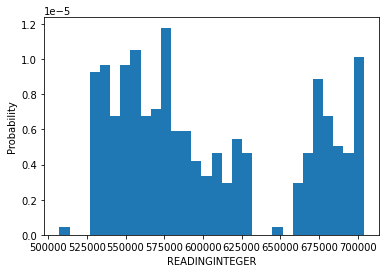

In [29]:
pyplot.hist(df['READINGINTEGER'], density=True, bins=30)  #Density = False would make counts
pyplot.ylabel('Probability')
pyplot.xlabel('READINGINTEGER')

Text(0.5, 0, 'DELTAINTEGER')

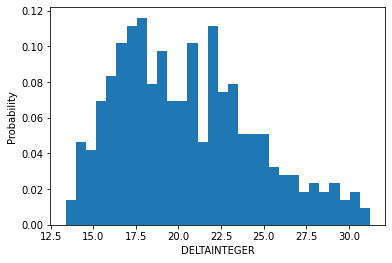

In [31]:
pyplot.hist(df['DELTAINTEGER'], density=True, bins=30)  #Density = False would make counts
pyplot.ylabel('Probability')
pyplot.xlabel('DELTAINTEGER')

In [34]:
#Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
corr_pe, _ = pearsonr(df['READINGINTEGER'], df['DELTAINTEGER'])
print('Pearsons correlation: %.3f' % corr_pe)

Pearsons correlation: -0.520


#### Spearman

Dos variables pueden estar relacionadas por una relación no lineal, de modo que la relación sea más fuerte o más débil a lo largo de la distribución de las variables.

Además, las dos variables que se consideran **pueden tener una distribución no gaussiana**.

El coeficiente de correlación de Spearman se puede utilizar para representar la fuerza entre dos muestras de datos. También se puede utilizar si existe una relación lineal entre las variables, pero su fuerza es ligeramente menor.

Los valores están entre -1 y 1 para variables perfectamente correlacionadas negativamente y perfectamente correlacionadas positivamente, respectivamente.

Si no se está seguro de la distribución y las posibles relaciones entre dos variables, el coeficiente de correlación de Spearman es una buena opcion como herramienta para usar.

In [35]:
#Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X))
corr_sp, _ = spearmanr(df['READINGINTEGER'], df['DELTAINTEGER'])
print('Spearmans correlation: %.3f' % corr_sp)

Spearmans correlation: -0.520


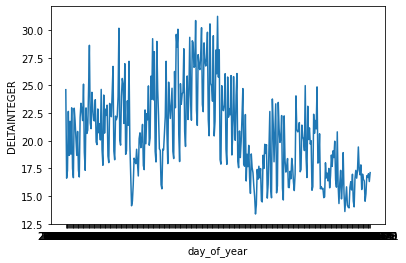

In [38]:
pyplot.plot(df['day_of_year'], df['DELTAINTEGER'])
pyplot.ylabel('DELTAINTEGER')
pyplot.xlabel('day_of_year')
pyplot.show()

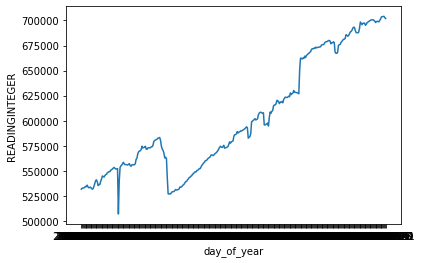

In [41]:
pyplot.plot(df['day_of_year'], df['READINGINTEGER'])
pyplot.ylabel('READINGINTEGER')
pyplot.xlabel('day_of_year')
pyplot.show()

## Autocorrelation and Partial Autocorrelation

Fuente: https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/ Jason Brownlee PhD